# Scikit-Learn Cours - Machine Learning

By freeCodeCamp.org

https://www.youtube.com/watch?v=pqNCD_5r0IU&list=PLY8_mf17J6TIGNwBjKW3t1Pwdb59t30Kt&index=7&t=2s


## Train Test Split

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

# split it in features and labels
X = iris.data
y = iris.target

print(f"Features:\n{X[:5]}\n...\n\nLabels:\n{y[:5]}\n...")

Features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
...

Labels:
[0 0 0 0 0]
...


In [3]:
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## KNN Example

In [94]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [95]:
data = pd.read_csv("data/car.data")

In [96]:
print(data.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [97]:
last_column_label = data.columns[-1]
y = data[last_column_label].copy().to_frame(name=last_column_label)
X = data.drop(columns=[last_column_label])

In [98]:
print(f"X sample:\n{X.head()}\n\ny sample:\n{y.head()}")

X sample:
  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     2       2    small    low
1  vhigh  vhigh     2       2    small    med
2  vhigh  vhigh     2       2    small   high
3  vhigh  vhigh     2       2      med    low
4  vhigh  vhigh     2       2      med    med

y sample:
   class
0  unacc
1  unacc
2  unacc
3  unacc
4  unacc


### Converting the data

In [99]:
X = X.values
Le = LabelEncoder()
for i in range(X.shape[1]):
    X[:, i] = Le.fit_transform(X[:, i])

In [100]:
print(X)

[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 ...
 [1 1 3 2 0 1]
 [1 1 3 2 0 2]
 [1 1 3 2 0 0]]


In [101]:
#y
label_mapping = {
  'unacc':0,
  'acc':1,
  'good':2,
  'vgood':3
 }
y['class'] = y['class'].map(label_mapping)
y = np.ravel(y)

In [105]:
print(y)

[0 0 0 ... 0 2 3]


### Create model

In [108]:
knn = neighbors.KNeighborsClassifier(
    n_neighbors=25,
    weights='uniform'
)
# somethign about 37 check comments

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, predictions)

print(f"Predictions: {predictions}")
print(f"Accuracy : {accuracy}")

a = 345
# check why is not working
# print(f"actual value: {y[a]}, predicted value: {knn.predict(X[a])}")
print(f"actual value: {y[a]}, predicted value: {predictions[a]}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 3 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 3 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0]
Accuracy : 0.791907514450867
actual value: 0, predicted value: 0


## Support Vector Machine

### Train tesrt split

In [6]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# split it in features and labels
X = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model

In [7]:
model = svm.SVC()
model.fit(X_train, y_train)

print(model)

SVC()


### Predictions

In [10]:
predictions = model.predict(X_test)

acc = accuracy_score(y_test, predictions)

print(f"Predictions: {predictions} \nActual: {y_test}\nAccuracy: {acc}")

Predictions: [0 0 1 1 0 2 1 1 1 0 0 0 2 2 2 2 1 1 1 1 0 1 0 1 0 0 0 0 1 0] 
Actual: [0 0 1 1 0 2 1 1 1 0 0 0 1 2 2 2 1 1 1 1 0 1 0 1 0 0 0 0 1 0]
Accuracy: 0.9666666666666667


## Linear Regression

In [110]:
# importing libraires

from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [111]:
# loading data to pandas

#column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#boston = pd.read_csv('data/housing.csv.xls', header=None, delimiter=r"\s+", names=column_names)

# loading data to numpy
boston = pd.read_csv('data/housing.csv.xls', header=None, delimiter=r"\s+")
boston = boston.to_numpy()


In [112]:
# separating labels from features

y = boston[:, -1:]
X = boston[:, :-1]

In [113]:
# shapes of you

print(f"Features shape: {X.shape}\nLabel shape: {y.shape}")

Features shape: (506, 13)
Label shape: (506, 1)


In [114]:
# model

l_reg = linear_model.LinearRegression()

### Simple data visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

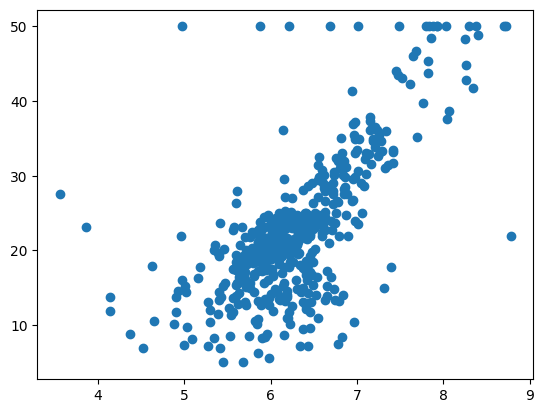

In [115]:
plt.scatter(X.T[5], y)
plt.show

By observing this linear trend we know that data should be proper for Linear regression.

In [116]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
# model training

model = l_reg.fit(X_train, y_train)

# predictions

predictions = model.predict(X_test)

print(f"Predictions: {predictions[:5]}...")

# R-squared value
r_squared = model.score(X, y)
print(f"R^2 value: {r_squared}")

# coefficients
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

# intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")

Predictions: [[11.60859569]
 [18.79738345]
 [23.27803875]
 [36.29343705]
 [18.70133038]]...
R^2 value: 0.7386180985935245
Coefficients: [[-1.12433324e-01  6.28000147e-02  4.83223070e-02  2.51767131e+00
  -1.77193752e+01  3.23856287e+00  8.51468976e-04 -1.62651388e+00
   3.41835139e-01 -1.55880596e-02 -9.60393291e-01  8.19137720e-03
  -5.49819287e-01]]
Intercept: [42.01568513]


## KNN Example

In [39]:
# libraries
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [23]:
# loading breast cancer dataset
bc = load_breast_cancer()

In [24]:
print(f"Breast cancer first obsevation: {bc['data'][0]}")
print(f"Breast cancer feature names: {bc['feature_names']}")
print(f"Breast cacer first label: {bc['target'][0]}")

Breast cancer first obsevation: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
Breast cancer feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast cacer first label: 0


In [25]:
X = scale(bc.data)
print(X[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [26]:
y = bc.target

In [27]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [28]:
# model
model = KMeans(n_clusters=2, random_state=0, n_init=10)

In [29]:
model.fit(X_train)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [30]:
# predictions
predictions = model.predict(X_test)

In [31]:
# labels
labels = model.labels_
accuracy = accuracy_score(y_test, predictions)

In [32]:
print(f"Labels: {labels}")
print(f"Predictions: {predictions}")
print(f"Accuracy: {accuracy}")
print(f"Actual values {y_test}")


Labels: [1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0
 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 0 

In [33]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0      149   41
1        6  316


### Evaluation benchmark from scikit-learn.org

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [34]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [36]:
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
bench_k_means(kmeans=model, name="KMeans", data=X_train, labels=labels)

init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
KMeans   	0.180s	10422	1.000	1.000	1.000	1.000	1.000	0.359


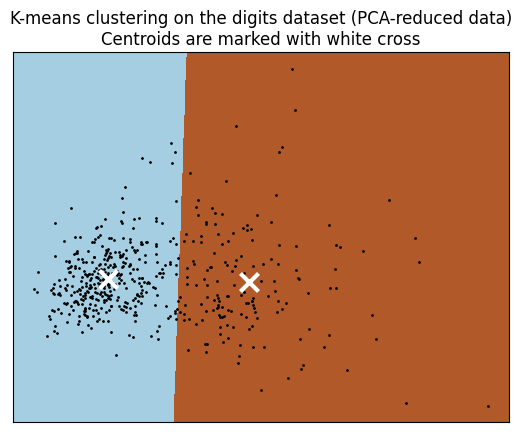

In [40]:
reduced_data = PCA(n_components=2).fit_transform(X_train)
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Handwritten Digits Recognizer

In [72]:
#from PIL import Image
import mnist
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [73]:
# training variables
x_train = mnist.train_images()
y_train = mnist.train_labels()

# testing variables
x_test = mnist.test_images()
y_test = mnist.test_labels()

In [74]:
print(f"Number of dimensions: {x_train.ndim}\nShape of training samples: {x_train.shape}")

Number of dimensions: 3
Shape of training samples: (60000, 28, 28)


In [75]:
# reshaping
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))
print(f"Shape of training samples after reshaping: {x_train.shape}")

Shape of training samples after reshaping: (60000, 784)


In [76]:
# normalizing dataset
x_train = (x_train/256)
x_test = (x_test/256)

In [77]:
# model
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(64,64))

In [78]:
# training
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64))

In [79]:
# predictions
predictions = clf.predict(x_test)

In [80]:
# accuracy confusion matrix
acc = confusion_matrix(y_test, predictions)

In [81]:
print(acc)

[[ 969    0    1    0    2    0    3    0    3    2]
 [   0 1123    2    2    0    1    2    1    4    0]
 [   4    1 1010    2    3    0    2    4    6    0]
 [   0    0    8  978    0    7    0    5    4    8]
 [   2    0    0    1  965    0    5    1    2    6]
 [   2    1    0    6    2  869    3    1    7    1]
 [   4    2    3    1    7    6  934    0    1    0]
 [   1    4    8    2    1    1    0 1006    1    4]
 [   4    0    1    5    2    3    4    2  951    2]
 [   5    3    0    6   13    3    0    5    2  972]]


In [82]:
def accuracy(cm):
    diagonal = cm.trace()
    elements = cm.sum()
    return diagonal/elements

In [83]:
acc = accuracy(acc)

In [84]:
print(f"Accuracy: {acc}")

Accuracy: 0.9777
